# Color manipulation of images

This is a starter notebook for manipulating images - specifically downsampling the color profile of an image.

First we will import our usual things and create a function that will help us change the # of colors in an image:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

Specify the directory path to your image, 
read in image, 
and Convert to an 5-color image for easier handling:

In [2]:
path_to_image1 = 'snoopy.jpg'
path_to_image2 = 'stitch.jpg'
path_to_image3 = 'gary.jpg'
snoopy = Image.open(path_to_image1)
stitch = Image.open(path_to_image2)
gary = Image.open(path_to_image3)

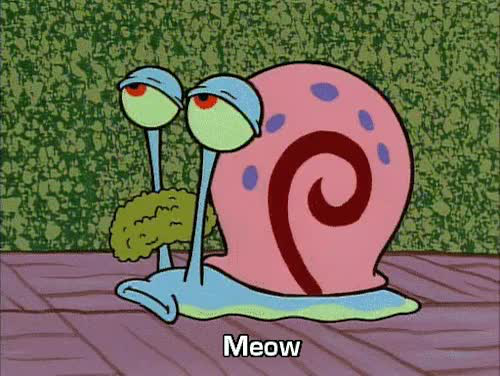

In [3]:
gary

In [4]:
new_gary, new_rgbs = convert_image(gary, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[144.52295538 189.88888169 178.85456194]
 [135.40735855 101.52900967 120.49648622]
 [110.43028697 130.64548684  73.30050178]
 [102.30169242  11.29021339  11.34334069]
 [ 17.02461632  17.38155296   7.94180216]
 [ 81.60991525  94.88749719  55.3720843 ]
 [208.64326934 131.19605477 142.1517746 ]
 [ 45.46183458  69.27799549  23.97766603]]


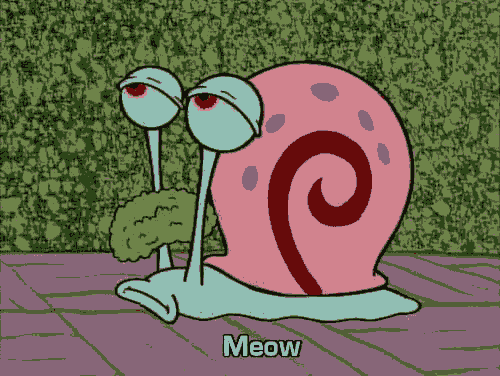

In [5]:
new_gary

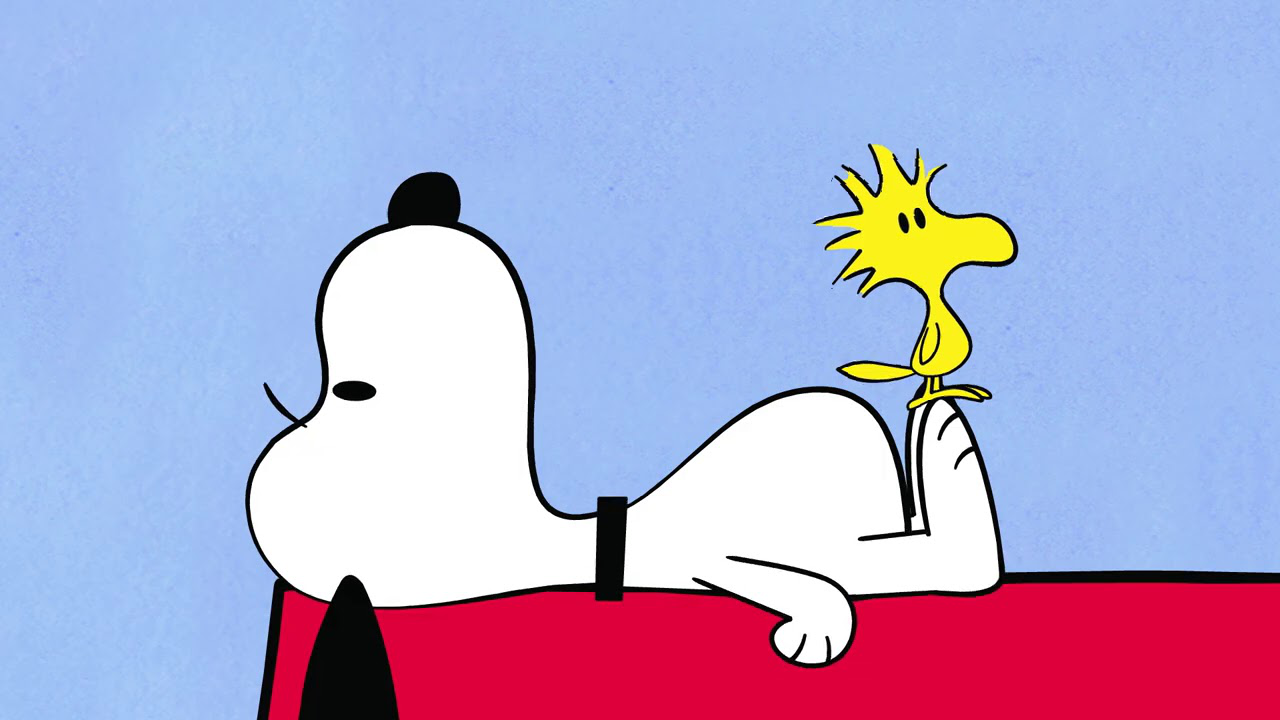

In [6]:
snoopy

In [7]:
new_snoopy, new_rgbs = convert_image(snoopy, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[162.01164969 195.2119638  245.6422674 ]
 [ 95.78696237 100.53270609  97.99484767]
 [247.93835573 240.62949755  30.81659555]
 [221.23504247   0.28170728  58.95106191]
 [158.06712407 189.4316859  244.12843333]
 [  9.73833922   8.72083261   9.41450406]
 [154.36763385 184.73710025 240.26269314]
 [254.67700582 254.70259644 254.67648667]]


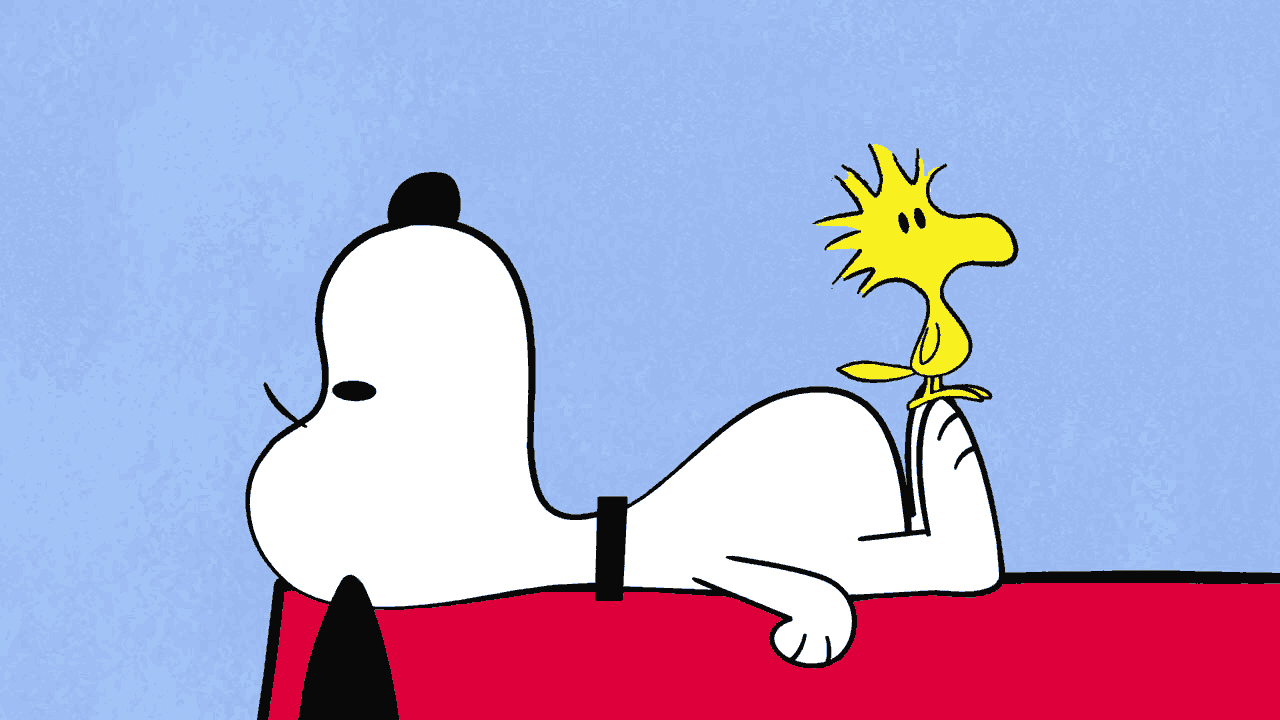

In [8]:
new_snoopy

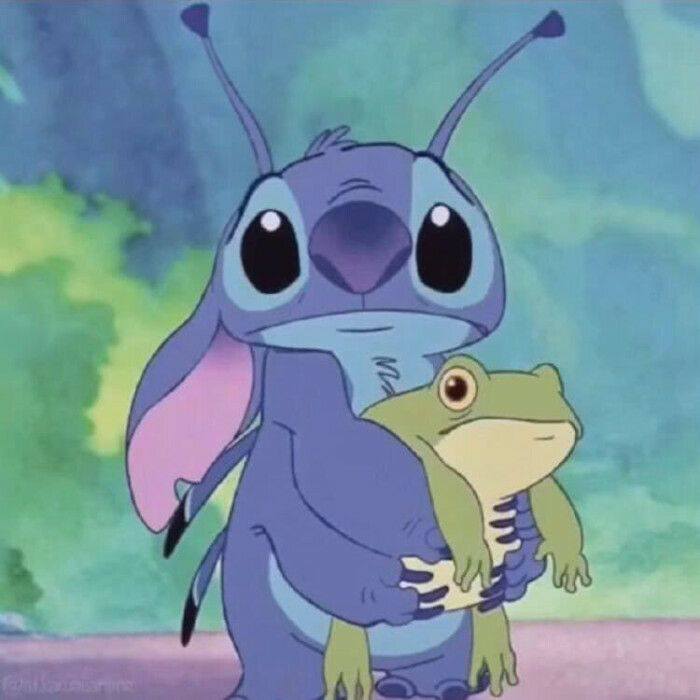

In [9]:
stitch

In [10]:
new_stitch, new_rgbs = convert_image(stitch, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[106.1123159  162.27602796 175.33050577]
 [104.38337777 163.31111312 125.29206399]
 [133.99771672 179.47964727 186.10002362]
 [ 25.74086169  25.54303171  37.66796587]
 [158.8121962  179.90706474 125.99389638]
 [ 75.54977605  92.41012144 128.89172092]
 [197.66487047 177.41270487 185.18921062]
 [102.43539149 118.42652518 166.75770066]]


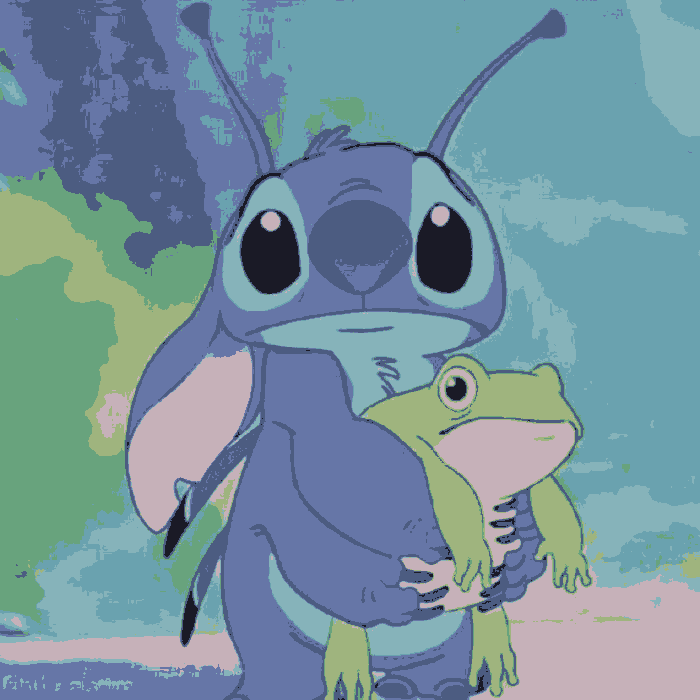

In [11]:
new_stitch

In [12]:
gary_data = np.array(new_gary)
snoopy_data = np.array(new_snoopy)
stitch_data = np.array(new_stitch)

In [13]:
np.unique(gary_data.reshape(-1, gary_data.shape[2]), axis=0)

array([[ 17,  17,   8],
       [ 45,  69,  24],
       [ 82,  95,  55],
       [102,  11,  11],
       [110, 131,  73],
       [135, 102, 120],
       [145, 190, 179],
       [209, 131, 142]], dtype=uint8)

In [14]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(gary_data.reshape(-1, gary_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = gary_data[:,:,0] == rgba[0]
    greens_mask = gary_data[:,:,1] == rgba[1]
    blues_mask = gary_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = gary_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

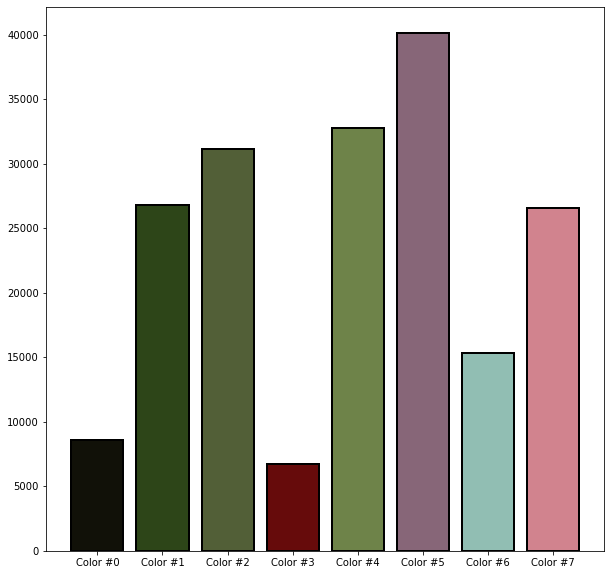

In [15]:
fig, ax = plt.subplots(figsize=(10,10))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

In [16]:
np.unique(snoopy_data.reshape(-1, snoopy_data.shape[2]), axis=0)

array([[ 10,   9,   9],
       [ 96, 101,  98],
       [154, 185, 240],
       [158, 189, 244],
       [162, 195, 246],
       [221,   0,  59],
       [248, 241,  31],
       [255, 255, 255]], dtype=uint8)

In [17]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(snoopy_data.reshape(-1, snoopy_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = snoopy_data[:,:,0] == rgba[0]
    greens_mask = snoopy_data[:,:,1] == rgba[1]
    blues_mask = snoopy_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = snoopy_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

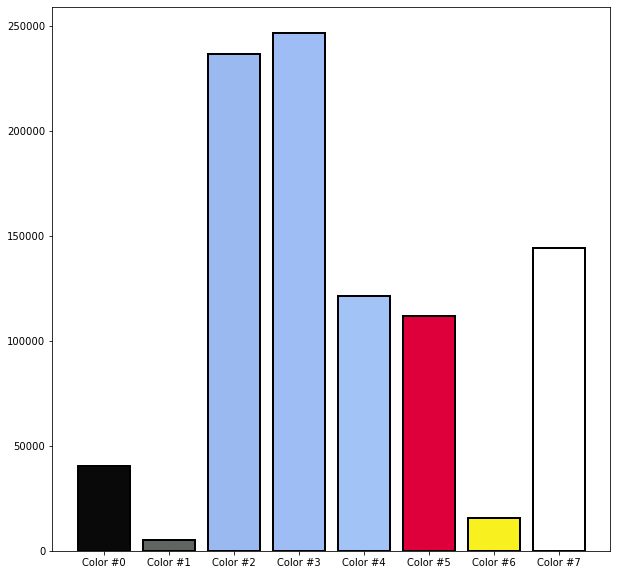

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()

In [19]:
np.unique(stitch_data.reshape(-1, stitch_data.shape[2]), axis=0)

array([[ 26,  26,  38],
       [ 76,  92, 129],
       [102, 118, 167],
       [104, 163, 125],
       [106, 162, 175],
       [134, 179, 186],
       [159, 180, 126],
       [198, 177, 185]], dtype=uint8)

In [20]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(stitch_data.reshape(-1, stitch_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = stitch_data[:,:,0] == rgba[0]
    greens_mask = stitch_data[:,:,1] == rgba[1]
    blues_mask = stitch_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = stitch_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

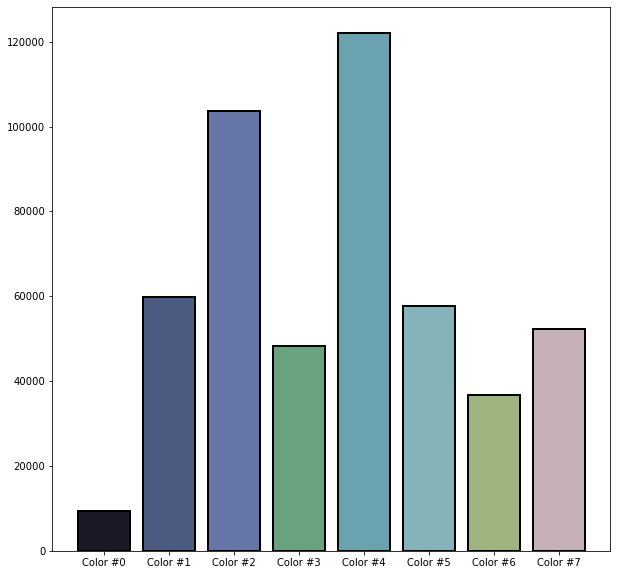

In [21]:
fig, ax = plt.subplots(figsize=(10,10))

myBarChart = ax.bar(color_labels, number_of_pixels_of_a_color) 
# set colors for each bar individually
for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

plt.show()